In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

In [4]:
alpha = 0.5
N = 1000000
S = 990000
I = 7000
R = 3000
t0, tf = 0, 25

In [5]:
def st(t, alp):
    return S * np.exp(-alp * t)

def diff_st(alp, y, t):
    return y - st(t, alp)

def it(t, alp):
    return (I + alp * S * t) * np.exp(-alp * t)

def diff_it(alp,  y, t):
    return y - it(t, alp)


In [6]:
t = np.linspace(t0, tf, 100)
y1 = np.array(S * np.exp(-alpha * t))
y2 = np.array((I + alpha * S * t) * np.exp(-alpha * t))
y3 = np.array(N - y1 - y2)

In [7]:
apx, _ = optimize.leastsq(diff_st, (0.2, ), args=(y1, t))

In [8]:
apx1, _ = optimize.leastsq(diff_it, (0.2, ), args=(y2, t))

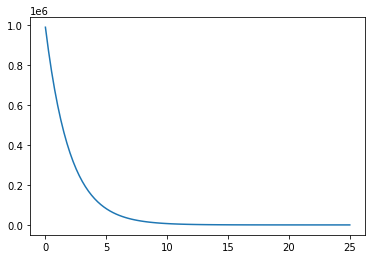

In [9]:
y1_apx = S * np.exp(-apx * t)
plt.plot(t, y1_apx)

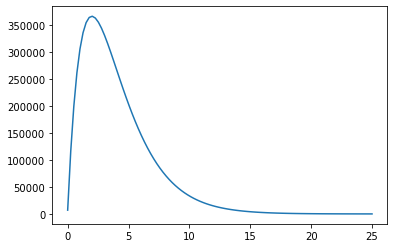

In [10]:
y2_apx = (I + alpha * S * t) * np.exp(-apx1 * t)
plt.plot(t, y2_apx)

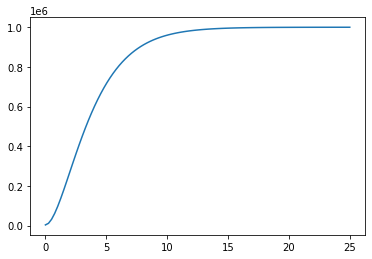

In [11]:
y3_rt = N - y1_apx - y2_apx
plt.plot(t, y3_rt)

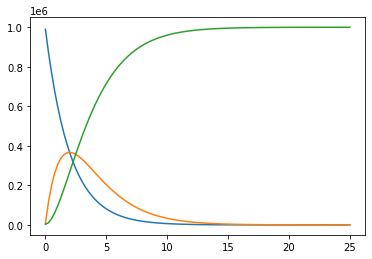

In [12]:
plt.plot(t, y1_apx, t, y2_apx, t, y3_rt)
plt.show()

In [13]:
result = optimize.minimize_scalar(lambda t, alp: -it(t, alp), bracket=(0, 10), args=(apx1, ) )

In [14]:
print(f'Max of I(t) is reached in point: {np.round(it(result.x, apx1)[0], 2)}')

Max of I(t) is reached in point: 366784.93
